Predicting Weather based on Music Listening Patterns

In [1]:
import pandas as pd
dataset_spotify = pd.read_csv('apiData.csv', header=0)
dataset_weather_alexandria = pd.read_csv('alexandria.csv', header=0)
dataset_weather = dataset_weather_alexandria[['date', 'conditions']]

The code above imports 2 files, a CSV containing all spotify data that has been cleaned and modified with song information such as energy, loudness, and such. The second dataset is the weather in Alexandria VA over the past 3 months. From this dataset, only the conditions are important with the date column as a key

In [2]:
merged_dataset = dataset_spotify.merge(dataset_weather, on='date',)
#merged_dataset.to_csv('./cleaned_data/merged.csv', index=False)
display(merged_dataset)

,Year,Month,Day,time,trackName,albumName,artistName,playlists.name,track_id,date,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,conditions
0,2023,6,22,02:00:00,"Amish Paradise (Parody of ""Gangsta's Paradise""...",Bad Hair Day,"""Weird Al"" Yankovic",HOmeWorK BANgers,5r96TaQquRrlo3Ym3ZlSL2,6/22/2023,...,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4,Partially cloudy
1,2023,6,22,02:00:00,"Amish Paradise (Parody of ""Gangsta's Paradise""...",Bad Hair Day,"""Weird Al"" Yankovic",HOmeWorK BANgers,5r96TaQquRrlo3Ym3ZlSL2,6/22/2023,...,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4,"Rain, Overcast"
2,2023,6,22,20:03:00,I'm Born To Run,What We Live For,American Authors,The Knew,6zDs6zI94L761vd0cVScTT,6/22/2023,...,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4,Partially cloudy
3,2023,6,22,20:03:00,I'm Born To Run,What We Live For,American Authors,The Knew,6zDs6zI94L761vd0cVScTT,6/22/2023,...,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4,"Rain, Overcast"
4,2023,6,22,10:09:00,Do I Wanna Know?,AM,Arctic Monkeys,Me and michael,5FVd6KXrgO9B3JPmC8OPst,6/22/2023,...,1,0.0323,0.186000,0.000263,0.2170,0.4050,85.030,272394,4,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,2023,6,19,17:29:00,Welcome to the Black Parade,The Black Parade,My Chemical Romance,Missing Her,5wQnmLuC1W7ATsArWACrgW,6/19/2023,...,1,0.0752,0.000289,0.000110,0.2220,0.2360,96.950,311107,4,"Rain, Partially cloudy"
1990,2023,7,30,13:31:00,So Tied Up,LA DIVINE,Cold War Kids,Missing Her,3msS7xaelR4Oa0n7IwHkgF,7/30/2023,...,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4,Clear
1991,2023,7,30,13:31:00,So Tied Up,LA DIVINE,Cold War Kids,Missing Her,3msS7xaelR4Oa0n7IwHkgF,7/30/2023,...,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4,Partially cloudy
1992,2023,7,30,05:30:00,Les pensées,Foundations,The Architect,Missing Her,0fira69E5qwYJNSvzEOCs7,7/30/2023,...,0,0.0392,0.015100,0.020500,0.0969,0.0392,97.975,238156,4,Clear


Merge the 2 datasets togeth based on the date key

In [3]:
def binary_precipitation(value):
    if value != 1 and value != 3:
        return 1
    else:
        return 0



Function to convert all values from conditions to a binary "Was it raining". It is important to note that "clear" and "overcast" are considered not raining.

In [4]:
def enumerate_conditions(conditions):
   condition_mapping = {condition: index for index, condition in enumerate(set(conditions))}
   enumerated_data = [condition_mapping[condition] for condition in conditions]
   return enumerated_data

Function to enumerate the weather conditions into numeric values. For example, Clear becomes 0 and Rain becomes 4.

In [5]:
merged_dataset['conditionsEnum'] = enumerate_conditions(merged_dataset['conditions'])
merged_dataset['conditionsBinary'] = merged_dataset['conditionsEnum'].apply(binary_precipitation)
display(merged_dataset[['conditionsEnum','conditionsBinary']])

,conditionsEnum,conditionsBinary
0,2,1
1,3,0
2,2,1
3,3,0
4,2,1
...,...,...
1989,4,1
1990,1,0
1991,2,1
1992,1,0


In [6]:
unique_conditions_key = merged_dataset[['conditions', 'conditionsEnum']].drop_duplicates()
unique_conditions_key = unique_conditions_key.sort_values(by='conditionsEnum')
display(unique_conditions_key)

,conditions,conditionsEnum
1330,Overcast,0
8,Clear,1
0,Partially cloudy,2
1,"Rain, Overcast",3
9,"Rain, Partially cloudy",4


Display the legend and dataframe for the eunumerate conditions of the weather. All duplicates are dropped and the dataframe is kept so it can be used in latger graphs to plot the data.

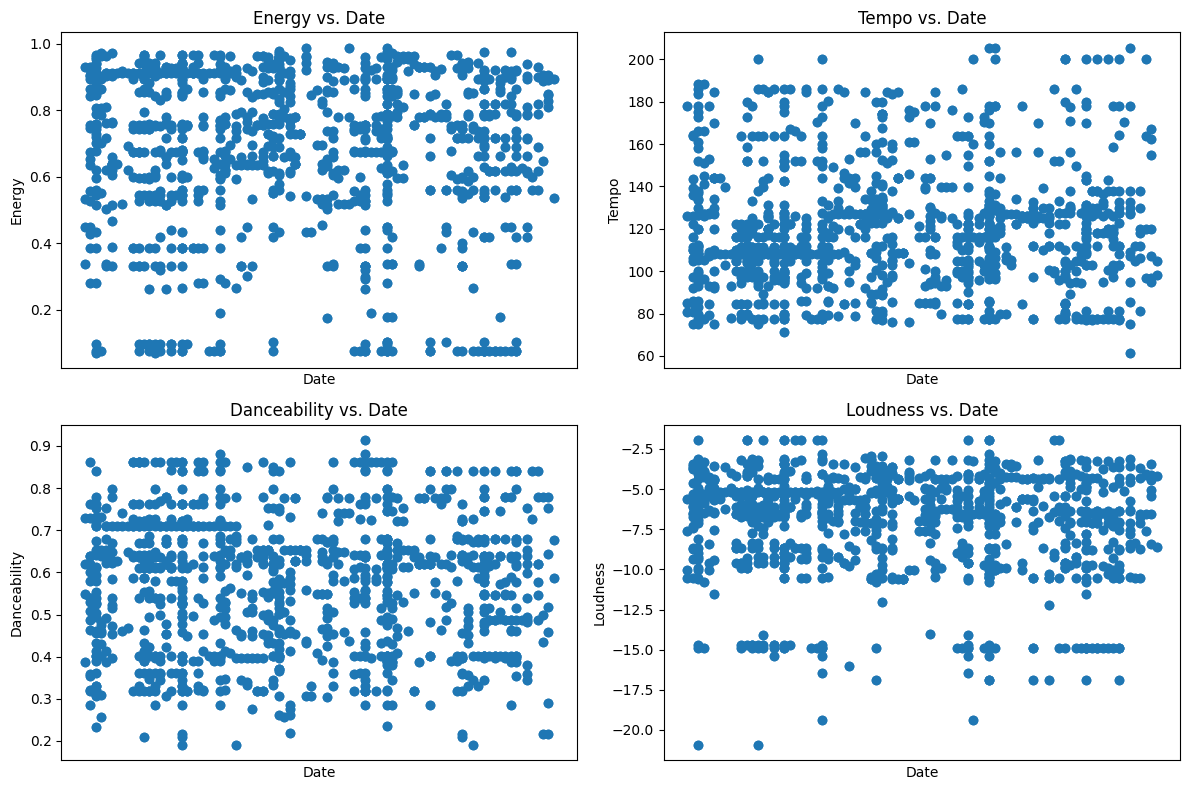

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have the necessary datasets for energy and temperature
energy_dataset = merged_dataset['energy']
tempo_dataset = merged_dataset['tempo']
danceability_dataset = merged_dataset['danceability']
loudness_dataset = merged_dataset['loudness']
date = merged_dataset['date']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].scatter(date, energy_dataset, marker='o', linestyle='-')
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 0].set_xticks([])
axes[0, 0].set_title('Energy vs. Date')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Energy')
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 0].tick_params(axis='x', rotation=30)

axes[0, 1].scatter(date, tempo_dataset, marker='o', linestyle='-')
axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 1].set_xticks([])
axes[0, 1].set_title('Tempo vs. Date')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Tempo')
axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0, 1].tick_params(axis='x', rotation=30)

axes[1, 0].scatter(date, danceability_dataset, marker='o', linestyle='-')
axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 0].set_xticks([])
axes[1, 0].set_title('Danceability vs. Date')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Danceability')
axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 0].tick_params(axis='x', rotation=30)

axes[1, 1].scatter(date, loudness_dataset, marker='o', linestyle='-')
axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 1].set_xticks([])
axes[1, 1].set_title('Loudness vs. Date')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Loudness')
axes[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

The 2x2 grid above compares several critical datapoints with respect to time. This is done because the key for both datasets was the date. If a significant patter is found, several datapoints would cluster. However, as shown above, the points are evenly speread accross both the X and Y. This visualization reveals no clear patterns.

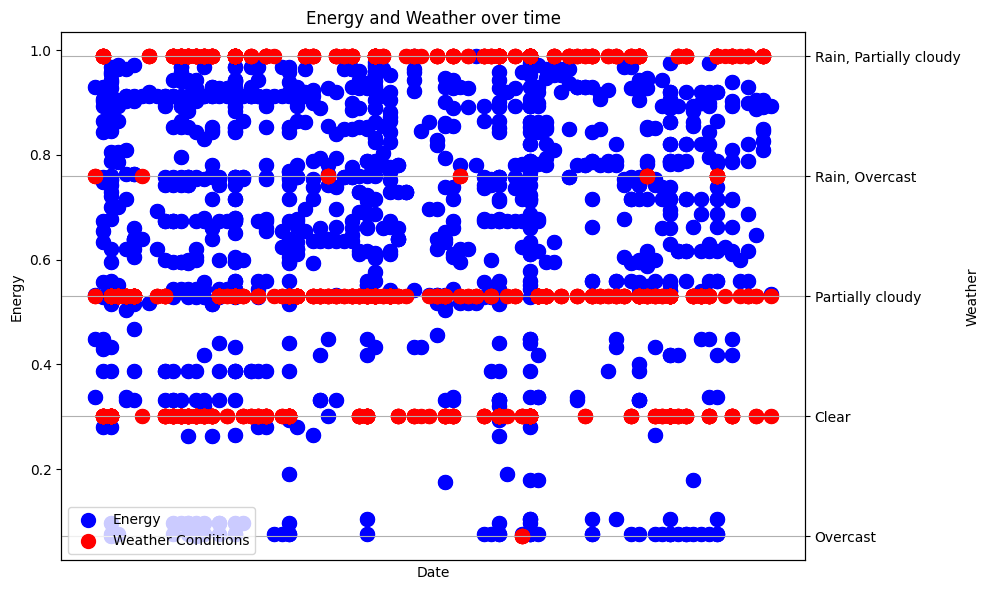

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.scatter(merged_dataset['date'], merged_dataset['energy'], marker='o', s=100, c='blue', label='Energy')
ax1.set_ylabel('Energy')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()


ax2.scatter(merged_dataset['date'], merged_dataset['conditionsEnum'], marker='o', s=100, c='red', label='Weather Conditions')
ax2.set_ylabel('Weather')

custom_ticks = unique_conditions_key['conditionsEnum'].tolist()
custom_labels = unique_conditions_key['conditions'].tolist()
ax2.set_yticks(custom_ticks)
ax2.set_yticklabels(custom_labels)

# Add a legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

plt.legend(lines, labels, loc='best')
plt.xticks([])
plt.grid(True)
plt.title('Energy and Weather over time')
plt.tight_layout()
plt.show()

Taking a closer look at the energy vs date graph, the weather conditions have been overlayed for a better visualizaation of energy compared to weather. The weather position values are enumerated between 0-4. As shown above, most of the datapoints for high energy take place on rainy days, where as low energy songs are on clear days. 

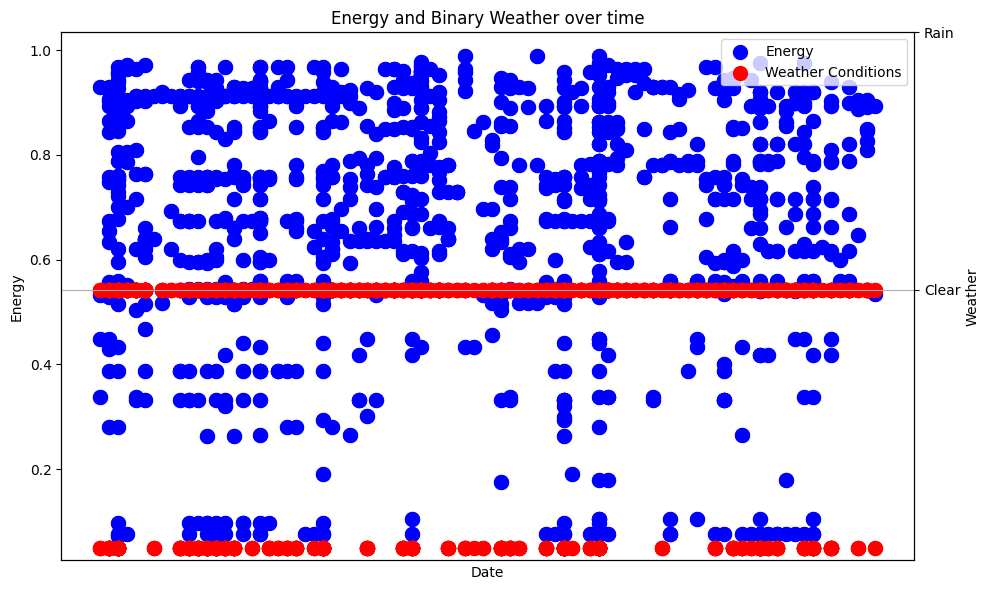

In [9]:
fig, binary_ax1 = plt.subplots(figsize=(10, 6))

binary_ax1.scatter(merged_dataset['date'], merged_dataset['energy'], marker='o', s=100, c='blue', label='Energy')
binary_ax1.set_ylabel('Energy')
binary_ax1.set_xlabel('Date')

binary_ax2 = binary_ax1.twinx()


binary_ax2.scatter(merged_dataset['date'], merged_dataset['conditionsBinary'], marker='o', s=100, c='red', label='Weather Conditions')
binary_ax2.set_ylabel('Weather')

#custom_ticks = unique_conditions_key['conditionsEnum'].tolist()
#custom_labels = unique_conditions_key['conditions'].tolist()
binary_ax2.set_yticks([1, 2])
binary_ax2.set_yticklabels(['Clear', 'Rain'])

# Add a legend for both lines
lines1, labels1 = binary_ax1.get_legend_handles_labels()
lines2, labels2 = binary_ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

plt.legend(lines, labels, loc='best')
plt.xticks([])
plt.grid(True)
plt.title('Energy and Binary Weather over time')
plt.tight_layout()
plt.show()

By removing the enumerated data and instead comparing the energy to a binary value, a cluster begins to form which will help with the training of a machine learning model. Specifically, all values with a high energy correlate to the true value for raining. 

Preliminary Hypothesis: Analysing the data above, I hypothesize a less than 50% correlation with the enumerated data. However, when comparing the the binary data, a stronger correlation will present itself. While not perfect, low energy songs correlate to a sunny/clear day where a high tempo song correlates to a rainy/cloudy day.

In [10]:
columns_to_drop = ['Year', 'Month', 'Day', 'time', 'trackName', 'albumName', 'artistName',
                   'playlists.name', 'track_id', 'hour', 'date', 'conditions','conditionsEnum','conditionsBinary']

x = merged_dataset.drop(columns=columns_to_drop, axis=1)

x.fillna(0, inplace=True)
#x.to_csv('./cleaned_data/cleaned.csv', index=False)
y = merged_dataset['conditionsEnum']
z = merged_dataset['conditionsBinary']

display(x)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.728,0.448,8,-10.540,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4
1,0.728,0.448,8,-10.540,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4
2,0.620,0.930,8,-5.615,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4
3,0.620,0.930,8,-5.615,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4
4,0.548,0.532,5,-7.596,1,0.0323,0.186000,0.000263,0.2170,0.4050,85.030,272394,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.217,0.905,2,-4.103,1,0.0752,0.000289,0.000110,0.2220,0.2360,96.950,311107,4
1990,0.587,0.894,0,-4.184,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4
1991,0.587,0.894,0,-4.184,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4
1992,0.678,0.535,10,-8.592,0,0.0392,0.015100,0.020500,0.0969,0.0392,97.975,238156,4


Seperate the merged dataset into a train and test data. X train remains the same, while the Y and Z are different values, one being the enumerated values of the weather while the second is the binary weather.

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
a_train, a_test, b_train, b_test = train_test_split(x, z, test_size=0.2)

Create the training and test for both testing factors.

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree1 = tree.fit(x_train, y_train)
y_pred = tree1.predict(x_test)
tree2 = tree.fit(a_train, b_train)
b_pred = tree2.predict(a_test)


Using a decision tree classifier, compare the training data to the predicted data. the y predict compares the enumerated data, while the b predict compares the binary data.

In [13]:
from sklearn import metrics
print("Enumerated Accuracy:",metrics.accuracy_score(y_test, y_pred))

Enumerated Accuracy: 0.3057644110275689


A low accuracy for the enumerated data is understandable due to the quality of the song data. Because songs varied from medium to high energy on the same day, the model was unable to find a valid pattern. For a better accuracy, more precise weather data should be used. From this,  time as a key for a more accurate dataset.

In [14]:
print("Binary Accuracy:",metrics.accuracy_score(b_test, b_pred))

Binary Accuracy: 0.6165413533834586


As predicted the binary accuracy was much higher than the enumerated data. However, a large part of this increase in accuracy is due to the binary prediction. By nature a decision between two values has a random 50% chance of success. Adding more data into the model increases the percentage by 11%.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

Using a nearest neighbor search, the Enumerated and Binary values are predicted and compared to the original data.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=5)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train, y_train)
knn2.fit(a_train, b_train)
y_pred = knn1.predict(x_test)
b_pred = knn2.predict(a_test)

In [17]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Enumerated Accuracy:", accuracy)

Enumerated Accuracy: 0.3308270676691729


In [18]:
accuracy = metrics.accuracy_score(b_test, b_pred)
print("Binary Accuracy:", accuracy)

Binary Accuracy: 0.6115288220551378


An important note for this data is the volatility of weather in Alexandria. While weather is predicted to rain, often times it only rains for 5 - 30 minutes. Recounting personal experience, mostly every day was clear skies and sunny. Similarly, most of the day I was working and not listening to music. Most of the data above visualizes my 2+ hours on the metro commuting.